In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras import layers, models, callbacks, optimizers
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score
import math

In [2]:
path = '/Users/HP Spectre/OneDrive - student.kit.edu/uni/Master/Lissabon Kurse/Intelligent Systems/IntSysGroup6/'

data = pd.read_csv(path+'Project/data/robot_inverse_kinematics_dataset_own.csv')
q3 = pd.read_csv(path+"Project/saved_pred/q3_pred.csv")
X = data.iloc[:,6:]
y = data.iloc[:,0:6]


scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
y = scaler_Y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)


In [3]:
model = tf.keras.Sequential([
        layers.Dense(100, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(100, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(100, activation='relu'),
        layers.Dense(6)
])

In [4]:
def adapt_learning_rate(epoch):
    return 0.001 * epoch
 
initial_learning_rate = 0.001
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,  # Adjust this value
    decay_rate=0.5,  # Adjust this value
    staircase=True
)
callbacks.LearningRateScheduler(lr_schedule)



model.compile(loss='mean_squared_error',
              optimizer=optimizers.Adam(0.0001))

In [5]:
early_stopping = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
          X_train,
          y_train,
          validation_split=0.2,
          verbose=1,
          epochs=20,
          batch_size=256,
          callbacks=[early_stopping])

Epoch 1/20
13/13 [==============================] - 2s 24ms/step - loss: 0.3346 - val_loss: 0.3205
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 0.3138 - val_loss: 0.3010
Epoch 3/20
13/13 [==============================] - 0s 10ms/step - loss: 0.2941 - val_loss: 0.2811
Epoch 4/20
13/13 [==============================] - 0s 10ms/step - loss: 0.2728 - val_loss: 0.2582
Epoch 5/20
13/13 [==============================] - 0s 10ms/step - loss: 0.2474 - val_loss: 0.2306
Epoch 6/20
13/13 [==============================] - 0s 10ms/step - loss: 0.2177 - val_loss: 0.1979
Epoch 7/20
13/13 [==============================] - 0s 10ms/step - loss: 0.1836 - val_loss: 0.1626
Epoch 8/20
13/13 [==============================] - 0s 10ms/step - loss: 0.1486 - val_loss: 0.1295
Epoch 9/20
13/13 [==============================] - 0s 10ms/step - loss: 0.1200 - val_loss: 0.1062
Epoch 10/20
13/13 [==============================] - 0s 10ms/step - loss: 0.1037 - val_loss: 0.0962
Epoch 11/2

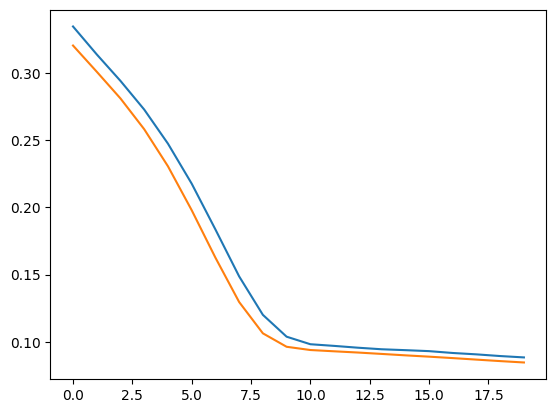

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [7]:
y_pred = model.predict(X_test)
print("MAE Absolute: " ,mean_absolute_error(y_test, y_pred))
y_pred = scaler_Y.inverse_transform(y_pred)
y_test = scaler_Y.inverse_transform(y_test)
print("MAE in deg ",math.degrees(mean_absolute_error(y_test, y_pred)))

ranges_joints = [330, 220,180, 320,240,360]

plt.show()

32/32 [==============================] - 0s 2ms/step
MAE Absolute:  0.24657814610912684
MAE in deg  22.184578087652035
